#### Importing Packages

#### Data Understanding

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('C:/Users/LENOVO PC/data.xlsx',index_col='Period',parse_dates=True)
data.index.freq = 'MS'
data.head()

,Passengers
Period,
2006-01-01,136457
2006-02-01,107825
2006-03-01,119168
2006-04-01,142807
2006-05-01,125653


In [24]:
data.tail()

,Passengers
Period,
2020-02-01,346962
2020-03-01,253517
2020-04-01,44122
2020-05-01,2423
2020-06-01,11396


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2006-01-01 to 2020-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  174 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [26]:
data.describe()

,Passengers
count,174.000000
mean,299877.178161
std,118006.509615
min,2423.000000
25%,192263.500000
50%,317256.000000
75%,391931.500000
max,547576.000000


#### Data Preparation

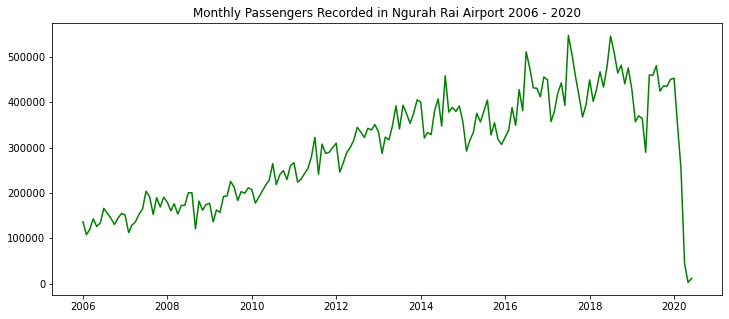

In [27]:
plt.figure(figsize=(12,5))
plt.title('Monthly Passengers Recorded in Ngurah Rai Airport 2006 - 2020')
plt.plot(data,color='green');

The graph shows that the Passengers data has a seasonal trend until 2018 with a constant ups and downs, but dropped significantly at the start of 2020. Looking back to what happened, this might be because the restriction on outdoor activities due to covid-19 spread, therefore Ngurah Rai has a decreasing number of passengers during that time

For a better look, we will separate the cyclic and trend pattern of the data

In [28]:
from statsmodels.tsa.filters.hp_filter import hpfilter
data_cycle, data_trend = hpfilter(data,lamb=1600)

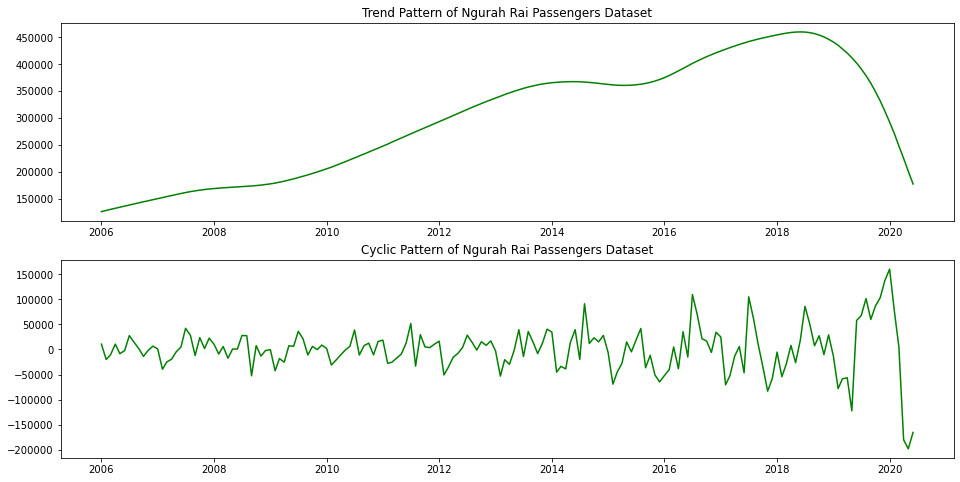

In [29]:
fig,ax=plt.subplots(2,1,figsize=(16,8))

ax[0].set_title('Trend Pattern of Ngurah Rai Passengers Dataset')
ax[0].plot(data_trend,color='green')

ax[1].set_title('Cyclic Pattern of Ngurah Rai Passengers Dataset')
ax[1].plot(data_cycle,color='green');

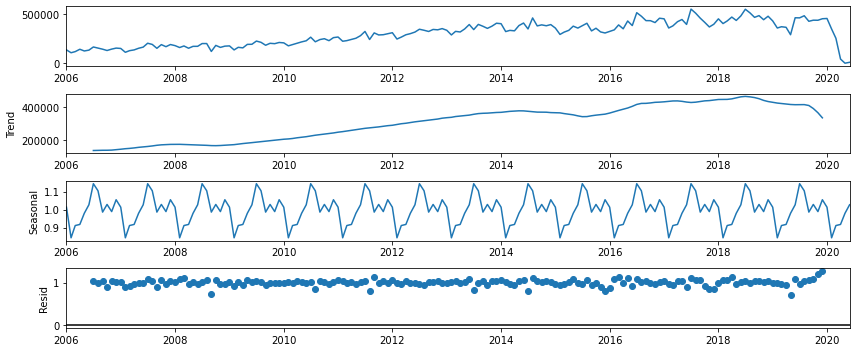

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=12,5
decompose = seasonal_decompose(data, model='mul')
decompose.plot();

#### Simple Moving Average

In [31]:
data = data['12_month_SMA'] = data.rolling(window=12).mean()
data.tail()

,Passengers,12_month_SMA
Period,,
2020-02-01,414182.500000,414182.500000
2020-03-01,404481.416667,404481.416667
2020-04-01,377806.583333,377806.583333
2020-05-01,353891.833333,353891.833333
2020-06-01,316485.416667,316485.416667


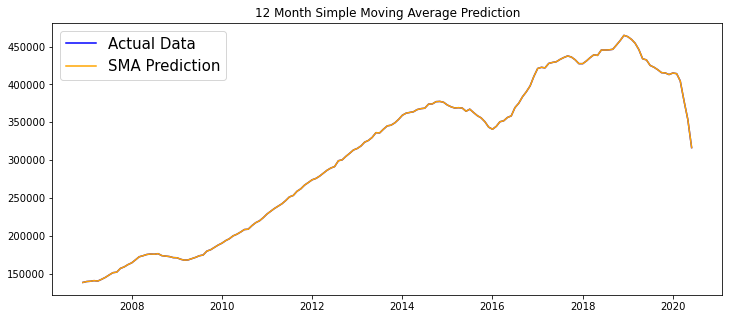

In [33]:
plt.figure(figsize=(12,5))
plt.title('12 Month Simple Moving Average Prediction')
plt.plot(data['Passengers'],color='blue',label='Actual Data')
plt.plot(data['12_month_SMA'],color='orange',label='SMA Prediction')
plt.legend(fontsize=15);

In [177]:
predict1 = data.rolling(window=12).mean()

In [178]:
prediction2 = predict1.predict(start=start, end=end, dynamic=False, typ='levels')

AttributeError: 'DataFrame' object has no attribute 'predict'

Failed to predict seasonality but managed to predict the trend pattern

#### Exponentially Weighed Moving Average

In [34]:
data1 = pd.read_excel('C:/Users/LENOVO PC/data.xlsx',index_col='Period',parse_dates=True)
data1.index.freq = 'MS'
data1.head()

,Passengers
Period,
2006-01-01,136457
2006-02-01,107825
2006-03-01,119168
2006-04-01,142807
2006-05-01,125653


In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)
data1['12_month_EWMA']=SimpleExpSmoothing(data1['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
data1.head()

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,12_month_EWMA
Period,,
2006-01-01,136457,136457.000000
2006-02-01,107825,132052.076923
2006-03-01,119168,130069.911243
2006-04-01,142807,132029.463359
2006-05-01,125653,131048.468996


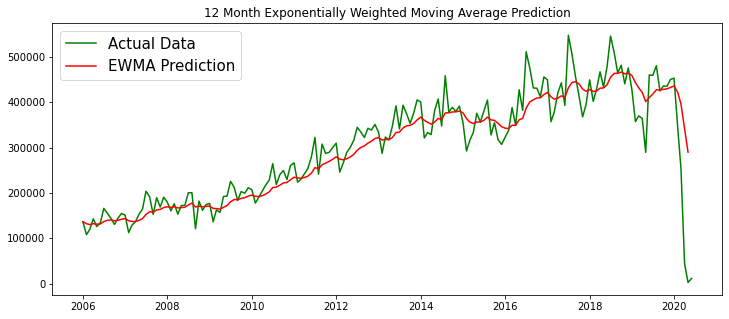

In [36]:
plt.figure(figsize=(12,5))
plt.title('12 Month Exponentially Weighted Moving Average Prediction')
plt.plot(data1['Passengers'],color='green',label='Actual Data')
plt.plot(data1['12_month_EWMA'],color='red',label='EWMA Prediction')
plt.legend(fontsize=15);

#### Data Splitting

In [37]:
df = pd.read_excel('C:/Users/LENOVO PC/data.xlsx',index_col='Period',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Passengers
Period,
2006-01-01,136457
2006-02-01,107825
2006-03-01,119168
2006-04-01,142807
2006-05-01,125653


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2006-01-01 to 2020-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  174 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [39]:
train = df.iloc[:122]
test = df.iloc[122:]

#### Holt-Winters

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [41]:
test_predictions = fitted_model.forecast(52).rename('HW Forecast')

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [42]:
test_predictions

2016-03-01    302895.141695
2016-04-01    311711.744193
2016-05-01    347537.504908
2016-06-01    348666.375220
2016-07-01    347170.967213
2016-08-01    383322.677144
2016-09-01    324462.280991
2016-10-01    341222.256164
2016-11-01    323094.458764
2016-12-01    329573.699400
2017-01-01    333780.624019
2017-02-01    273744.567999
2017-03-01    294380.765371
2017-04-01    302949.533351
2017-05-01    337768.232655
2017-06-01    338865.370444
2017-07-01    337411.998326
2017-08-01    372547.484421
2017-09-01    315341.652817
2017-10-01    331630.505425
2017-11-01    314012.280045
2017-12-01    320309.389357
2018-01-01    324398.057410
2018-02-01    266049.613713
2018-03-01    286105.727994
2018-04-01    294433.628078
2018-05-01    328273.574447
2018-06-01    329339.871716
2018-07-01    327927.353859
2018-08-01    362075.182147
2018-09-01    306477.405316
2018-10-01    322308.378606
2018-11-01    305185.401186
2018-12-01    311305.498882
2019-01-01    315279.234559
2019-02-01    258570

In [91]:
len(test_predictions)

52

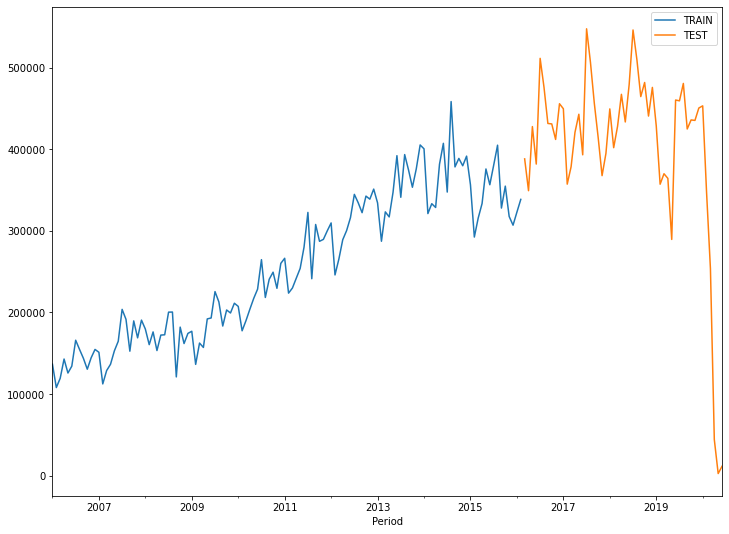

In [43]:
train['Passengers'].plot(legend=True,label='TRAIN')
test['Passengers'].plot(legend=True,label='TEST',figsize=(12,9));

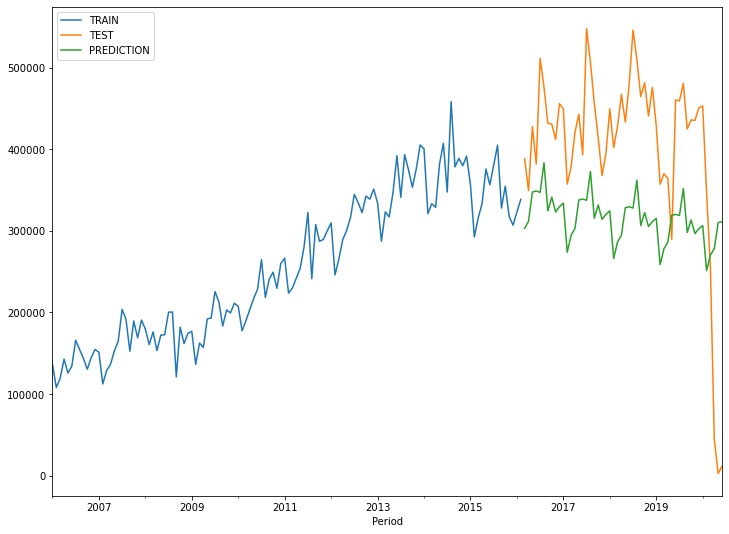

In [44]:
train['Passengers'].plot(legend=True,label='TRAIN')
test['Passengers'].plot(legend=True,label='TEST',figsize=(12,9))
test_predictions.plot(legend=True,label='PREDICTION');

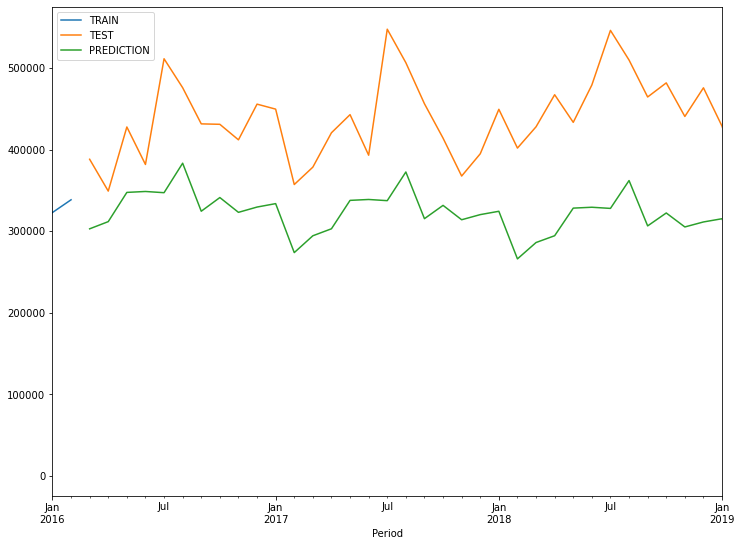

In [45]:
train['Passengers'].plot(legend=True,label='TRAIN')
test['Passengers'].plot(legend=True,label='TEST',figsize=(12,9))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2016-01-01','2019-01-01']);

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
MAE_HW = mean_absolute_error(test,test_predictions)
MAE_HW

123685.15923028982

In [48]:
MSE_HW = mean_squared_error(test,test_predictions)
MSE_HW

18589210447.86

In [49]:
RMSE_HW = np.sqrt(mean_squared_error(test,test_predictions))
RMSE_HW

136342.2548143458

In [50]:
test.describe()

,Passengers
count,52.000000
mean,404573.192308
std,111735.103395
min,2423.000000
25%,380955.750000
50%,431268.500000
75%,459531.250000
max,547576.000000


In [51]:
final_model = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [52]:
forecast_predictions = final_model.forecast(52)

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


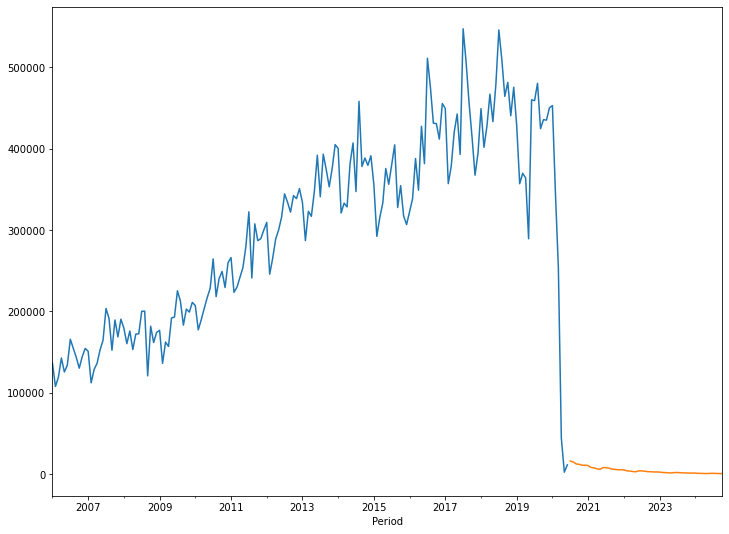

In [53]:
df['Passengers'].plot(figsize=(12,9))
forecast_predictions.plot();

#### Autoregression

In [54]:
from statsmodels.tsa.ar_model import AutoReg,ARResults
nlag = 3

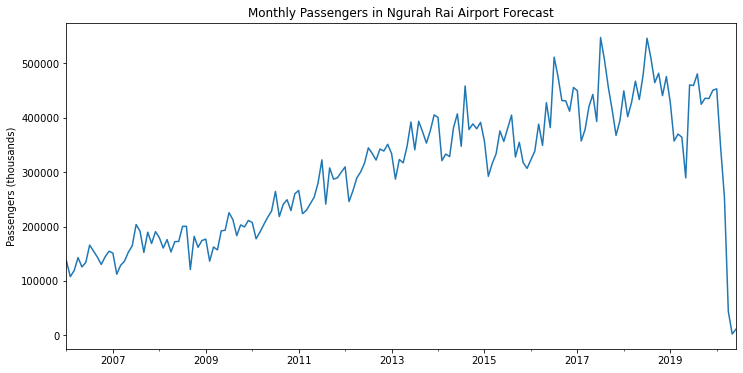

In [55]:
title='Monthly Passengers in Ngurah Rai Airport Forecast'
ylabel='Passengers (thousands)'
xlabel='' 

ax = df['Passengers'].plot(figsize=(12,6),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [56]:
model = AutoReg(train['Passengers'], lags=nlag)

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [57]:
AR1fit = model.fit()

In [58]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end).rename('Predictions')

In [60]:
predictions1

2016-03-01    327548.394027
2016-04-01    329644.968710
2016-05-01    330073.739511
2016-06-01    329034.534833
2016-07-01    329017.930903
2016-08-01    328773.635936
2016-09-01    328472.501806
2016-10-01    328251.041228
2016-11-01    328012.252164
2016-12-01    327779.082352
2017-01-01    327557.108439
2017-02-01    327339.264392
2017-03-01    327127.718144
2017-04-01    326922.368667
2017-05-01    326722.603488
2017-06-01    326528.467003
2017-07-01    326339.780922
2017-08-01    326156.367294
2017-09-01    325978.094421
2017-10-01    325804.814984
2017-11-01    325636.387942
2017-12-01    325472.678553
2018-01-01    325313.554326
2018-02-01    325158.886809
2018-03-01    325008.551256
2018-04-01    324862.426306
2018-05-01    324720.394028
2018-06-01    324582.339801
2018-07-01    324448.152204
2018-08-01    324317.722941
2018-09-01    324190.946748
2018-10-01    324067.721309
2018-11-01    323947.947176
2018-12-01    323831.527683
2019-01-01    323718.368874
2019-02-01    323608

#### Plotting

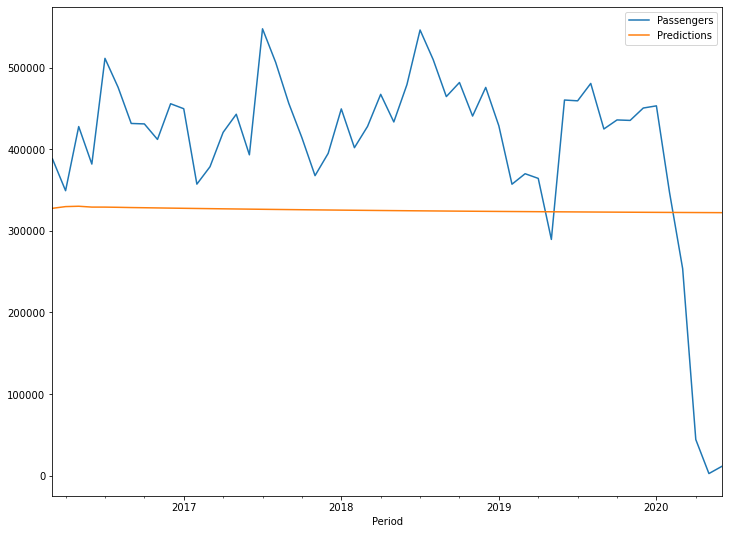

In [61]:
test['Passengers'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,9));

In [62]:
MAE_AR = mean_absolute_error(test, predictions1)
MAE_AR

118273.75449586667

In [63]:
MSE_AR = mean_squared_error(test,predictions1)
MSE_AR

18395021722.68661

In [64]:
RMSE_AR = np.sqrt(MSE_AR)
RMSE_AR

135628.24824750415

In [103]:
model = AutoReg(df['Passengers'], lags=nlag)

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [104]:
ARfit = model.fit()

In [105]:
fcast = ARfit.predict(start=len(df), end=len(df)+19, dynamic=False).rename('Forecast')

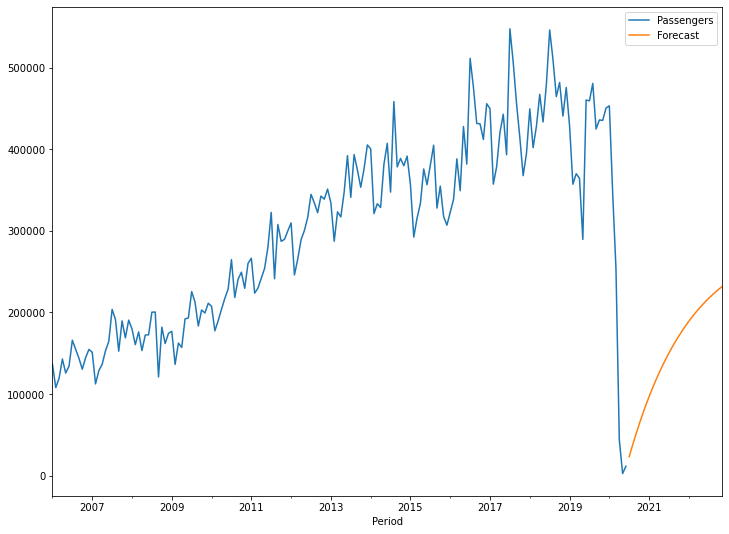

In [106]:
df['Passengers'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,9));

#### Arima

In [120]:
df.head()

,Passengers
Period,
2006-01-01,136457
2006-02-01,107825
2006-03-01,119168
2006-04-01,142807
2006-05-01,125653


In [123]:
len(df)

174

In [125]:
from statsmodels.tsa.arima.model import ARIMAResults,ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
p = 0
d = 1
q = 3


from pmdarima import auto_arima

In [126]:
auto_arima(df['Passengers'])

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [133]:
model = ARIMA(train['Passengers'],order=(p,d,q))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  122
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1413.515
Date:                Tue, 28 Dec 2021   AIC                           2835.030
Time:                        17:04:16   BIC                           2846.213
Sample:                    01-01-2006   HQIC                          2839.572
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5243      0.094     -5.568      0.000      -0.709      -0.340
ma.L2          0.0384      0.113      0.339      0.734      -0.183       0.260
ma.L3         -0.1123      0.132     -0.853      0.394      -0.371       0.146
sigma2      8.956e+08   2.34e-11   3.83e+19      0.000    8.96e+08    8.96e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 9.91
Prob(Q):                              0.71   Prob(JB):                         0.01
Heteroskedasticity (H):               2.22   Skew:                            -0.46
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.68e+35. Standard errors may be unstable.
"""

In [134]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(p,d,q) Predictions')

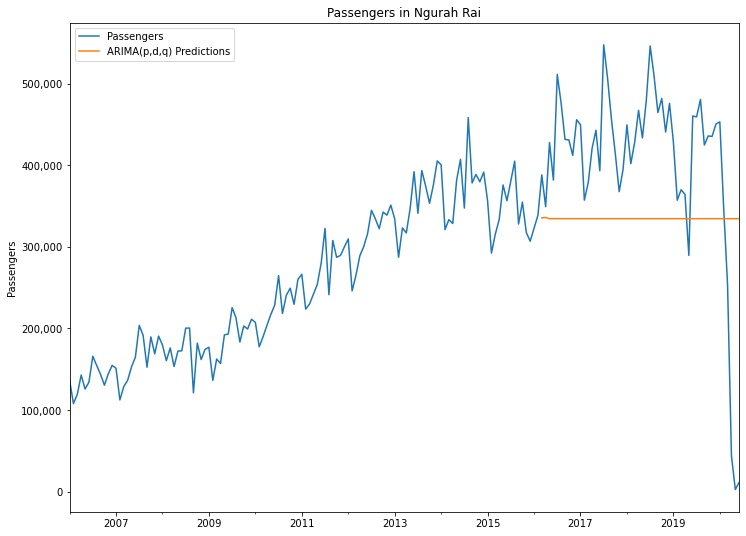

In [135]:
title = 'Passengers in Ngurah Rai'
ylabel='Passengers'
xlabel='' 

ax = df['Passengers'].plot(legend=True,figsize=(12,9),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [136]:
model = ARIMA(df['Passengers'],order=(p,d,q))
results = model.fit()
fcast = results.predict(len(df),len(df)+28,typ='levels').rename('ARIMA(p,d,q) Forecast')

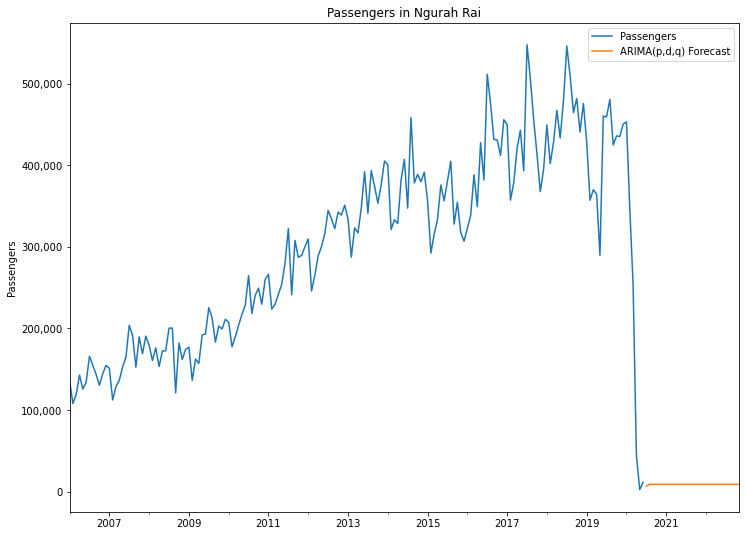

In [137]:
title = 'Passengers in Ngurah Rai'
ylabel='Passengers'
xlabel='' 

ax = df['Passengers'].plot(legend=True,figsize=(12,9),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [138]:
MAE_ARIMA1 = mean_absolute_error(test, predictions)
MAE_ARIMA1

111279.80170820284

In [139]:
MSE_ARIMA1 = mean_squared_error(test,predictions)
MSE_ARIMA1

17158375338.184328

In [140]:
RMSE_ARIMA1 = np.sqrt(MSE_ARIMA1)
RMSE_ARIMA1

130989.98182374226

#### ARIMA Different Order

In [155]:
model1 = ARIMA(train['Passengers'],order=(0,1,1))
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  122
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1414.179
Date:                Tue, 28 Dec 2021   AIC                           2832.359
Time:                        17:08:10   BIC                           2837.950
Sample:                    01-01-2006   HQIC                          2834.630
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5060      0.078     -6.492      0.000      -0.659      -0.353
sigma2      8.564e+08   5.58e-12   1.53e+20      0.000    8.56e+08    8.56e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.45
Prob(Q):                              0.85   Prob(JB):                         0.04
Heteroskedasticity (H):               2.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [156]:
predictions11 = results1.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,1,1) Predictions')

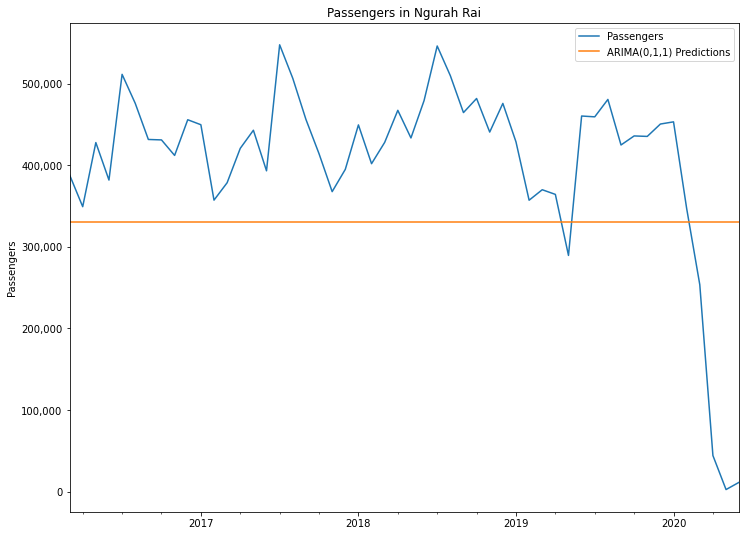

In [158]:
title = 'Passengers in Ngurah Rai'
ylabel='Passengers'
xlabel='' 

ax = test['Passengers'].plot(legend=True,figsize=(12,9),title=title)
predictions11.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [159]:
model1 = ARIMA(df['Passengers'],order=(0,1,1))
results1 = model1.fit()
fcast1 = results1.predict(len(df),len(df)+28,typ='levels').rename('ARIMA(0,1,1) Forecast')

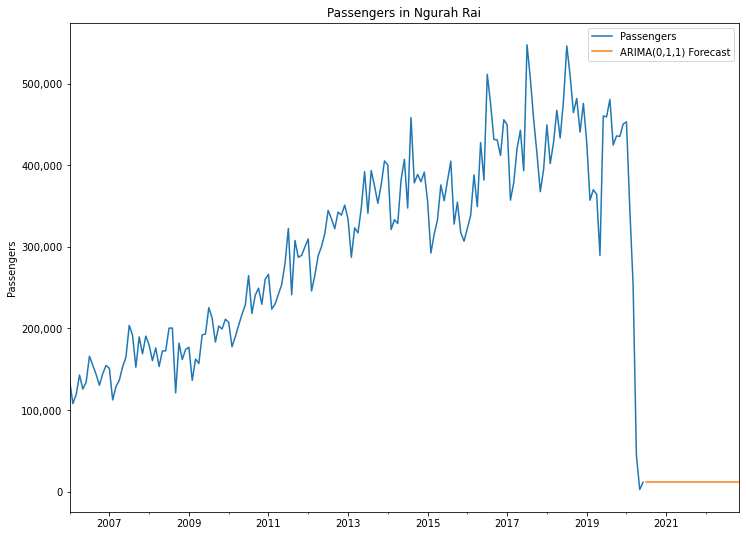

In [160]:
title = 'Passengers in Ngurah Rai'
ylabel='Passengers'
xlabel='' 

ax = df['Passengers'].plot(legend=True,figsize=(12,9),title=title)
fcast1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [161]:
MAE_ARIMA2 = mean_absolute_error(test,predictions11)
MAE_ARIMA2

114612.78818515704

In [162]:
MSE_ARIMA2 = mean_squared_error(test,predictions11)
MSE_ARIMA2

17748335831.573387

In [163]:
RMSE_ARIMA2 = np.sqrt(MSE_ARIMA2)
RMSE_ARIMA2 

133222.88028553274

In [164]:
#### SARIMA

In [165]:
import matplotlib.pyplot as plt
import pmdarima as pm

In [167]:
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3886.723, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3898.598, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3888.084, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3889.389, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3889.859, Time=0.11 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=3874.350, Time=0.95 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3874.817, Time=0.52 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=3873.229, Time=0.46 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3885.835, Time=0.18 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=3895.428, Time=0.39 sec
 ARIMA(2,1,0)(0,1,2)[12]             : 

In [168]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  174
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1932.614
Date:                                 Tue, 28 Dec 2021   AIC                           3873.229
Time:                                         17:14:51   BIC                           3885.554
Sample:                                              0   HQIC                          3878.233
                                                 - 174                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1570      0.055     -2.879      0.004      -0.264      -0.050
ma.S.L12      -0.4353      0.111     -3.917      0.000      -0.653      -0.218
ma.S.L24      -0.3684      0.110     -3.339      0.001      -0.585      -0.152
sigma2      1.761e+09   6.65e-11   2.65e+19      0.000    1.76e+09    1.76e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               379.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              11.43   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+33. Standard errors may be unstable.
"""

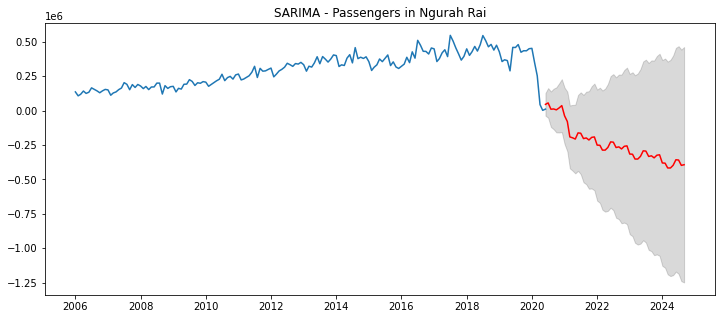

In [169]:
n_periods = 52
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')


fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


plt.plot(df)
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Passengers in Ngurah Rai")
plt.show()

In [170]:
import statsmodels.api as sm
model_SARIMA = sm.tsa.statespace.SARIMAX(df['Passengers'],order=(1,1,0),seasonal_order=(0,1,2,12))
results_sarima = model_SARIMA.fit()

<AxesSubplot:xlabel='Period'>

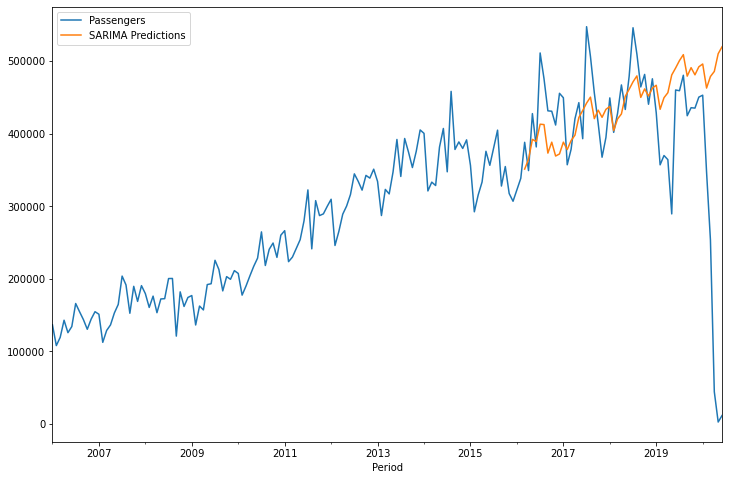

In [171]:
df2 = df.copy()
df2['SARIMA Predictions']=results_sarima.predict(start=start,end=end,dynamic=True)
df2[['Passengers','SARIMA Predictions']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Period'>

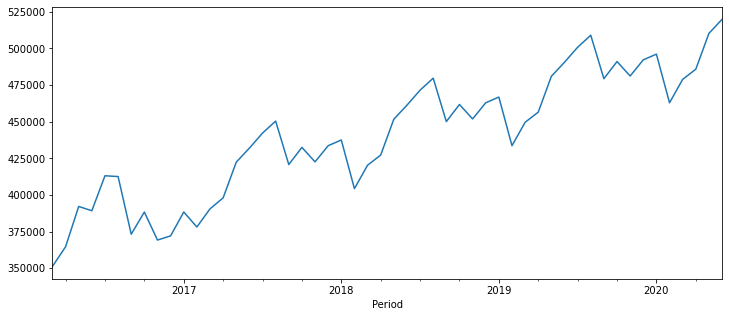

In [172]:
predictions_sarima = results_sarima.predict(start=start, end=end, dynamic=True)
predictions_sarima.plot()

In [173]:
MAE_SARIMA = mean_absolute_error(test,predictions_sarima)
MAE_SARIMA

74028.50145297953

In [174]:
MSE_SARIMA = mean_squared_error(test,predictions_sarima)
MSE_SARIMA

17645267210.473095

In [175]:
RMSE_SARIMA = np.sqrt(MSE_SARIMA)
RMSE_SARIMA

132835.4892732853

In [342]:
data_used         = ['Holt-Winters', 'Autoregressionn', 'ARIMA Order(0,1,0)', 'ARIMA Order(2,2,1)', 'SARIMA']
MAE               = [MAE_HW, MAE_AR, MAE_ARIMA1, MAE_ARIMA2, MAE_SARIMA]
MSE               = [MSE_HW, MSE_AR, MSE_ARIMA1, MSE_ARIMA2, MSE_SARIMA]
RMSE              = [RMSE_HW, RMSE_AR, RMSE_ARIMA1, RMSE_ARIMA2, RMSE_SARIMA]
model_performance = pd.DataFrame({'Data': data_used, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE})
model_performance

,Data,MAE,MSE,RMSE
0,Holt-Winters,123685.159230,1.858921e+10,136342.254814
1,Autoregressionn,118273.754496,1.839502e+10,135628.248248
2,"ARIMA Order(0,1,0)",111279.801708,1.715838e+10,130989.981824
3,"ARIMA Order(2,2,1)",114612.788185,1.774834e+10,133222.880286
4,SARIMA,74028.501453,1.764527e+10,132835.489273


#### Detecting Anomalies

In [182]:
data0 = pd.read_excel('C:/Users/LENOVO PC/data.xlsx',index_col='Period',parse_dates=True)
data0.index.freq = 'MS'
data0.head()

,Passengers
Period,
2006-01-01,136457
2006-02-01,107825
2006-03-01,119168
2006-04-01,142807
2006-05-01,125653


In [246]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [272]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size

train, test = df.iloc[:train_size], df.iloc[train_size:]
print(train.shape, test.shape)

(121, 1) (53, 1)


In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [274]:
scaler = scaler.fit(train[['Passengers']])

In [275]:
len(train)

121

In [276]:
train['Passengers'] = scaler.transform(train[['Passengers']])
test['Passengers'] = scaler.transform(test[['Passengers']])

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_10572/1826713681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'] = scaler.transform(train[['Passengers']])
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_10572/1826713681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Passengers'] = scaler.transform(test[['Passengers']])


In [277]:
train.head()

,Passengers
Period,
2006-01-01,-1.331199
2006-02-01,-1.653911
2006-03-01,-1.526064
2006-04-01,-1.259627
2006-05-01,-1.452971


In [278]:
test.shape

(53, 1)

In [280]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(train.shape[0], train.shape[1])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=train.shape[0]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=train.shape[1])))

model.compile(loss='mae', optimizer='adam', metrics = ['accuracy'])

In [281]:
history = model.fit(
    train, train.Passengers,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
4/4 [==============================] - 6s 433ms/step - loss: 0.8721 - accuracy: 0.0000e+00 - val_loss: 0.9379 - val_accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 72ms/step - loss: 0.7866 - accuracy: 0.0000e+00 - val_loss: 0.8411 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 69ms/step - loss: 0.6779 - accuracy: 0.0000e+00 - val_loss: 0.6601 - val_accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 65ms/step - loss: 0.4591 - accuracy: 0.0000e+00 - val_loss: 0.1958 - val_accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 67ms/step - loss: 0.2616 - accuracy: 0.0000e+00 - val_loss: 0.3188 - val_accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 67ms/step - loss: 0.2378 - accuracy: 0.0000e+00 - val_loss: 0.1502 - val_accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 71ms/step - loss: 0.1763 - accuracy: 0.0000e+00 - val_loss: 0.15

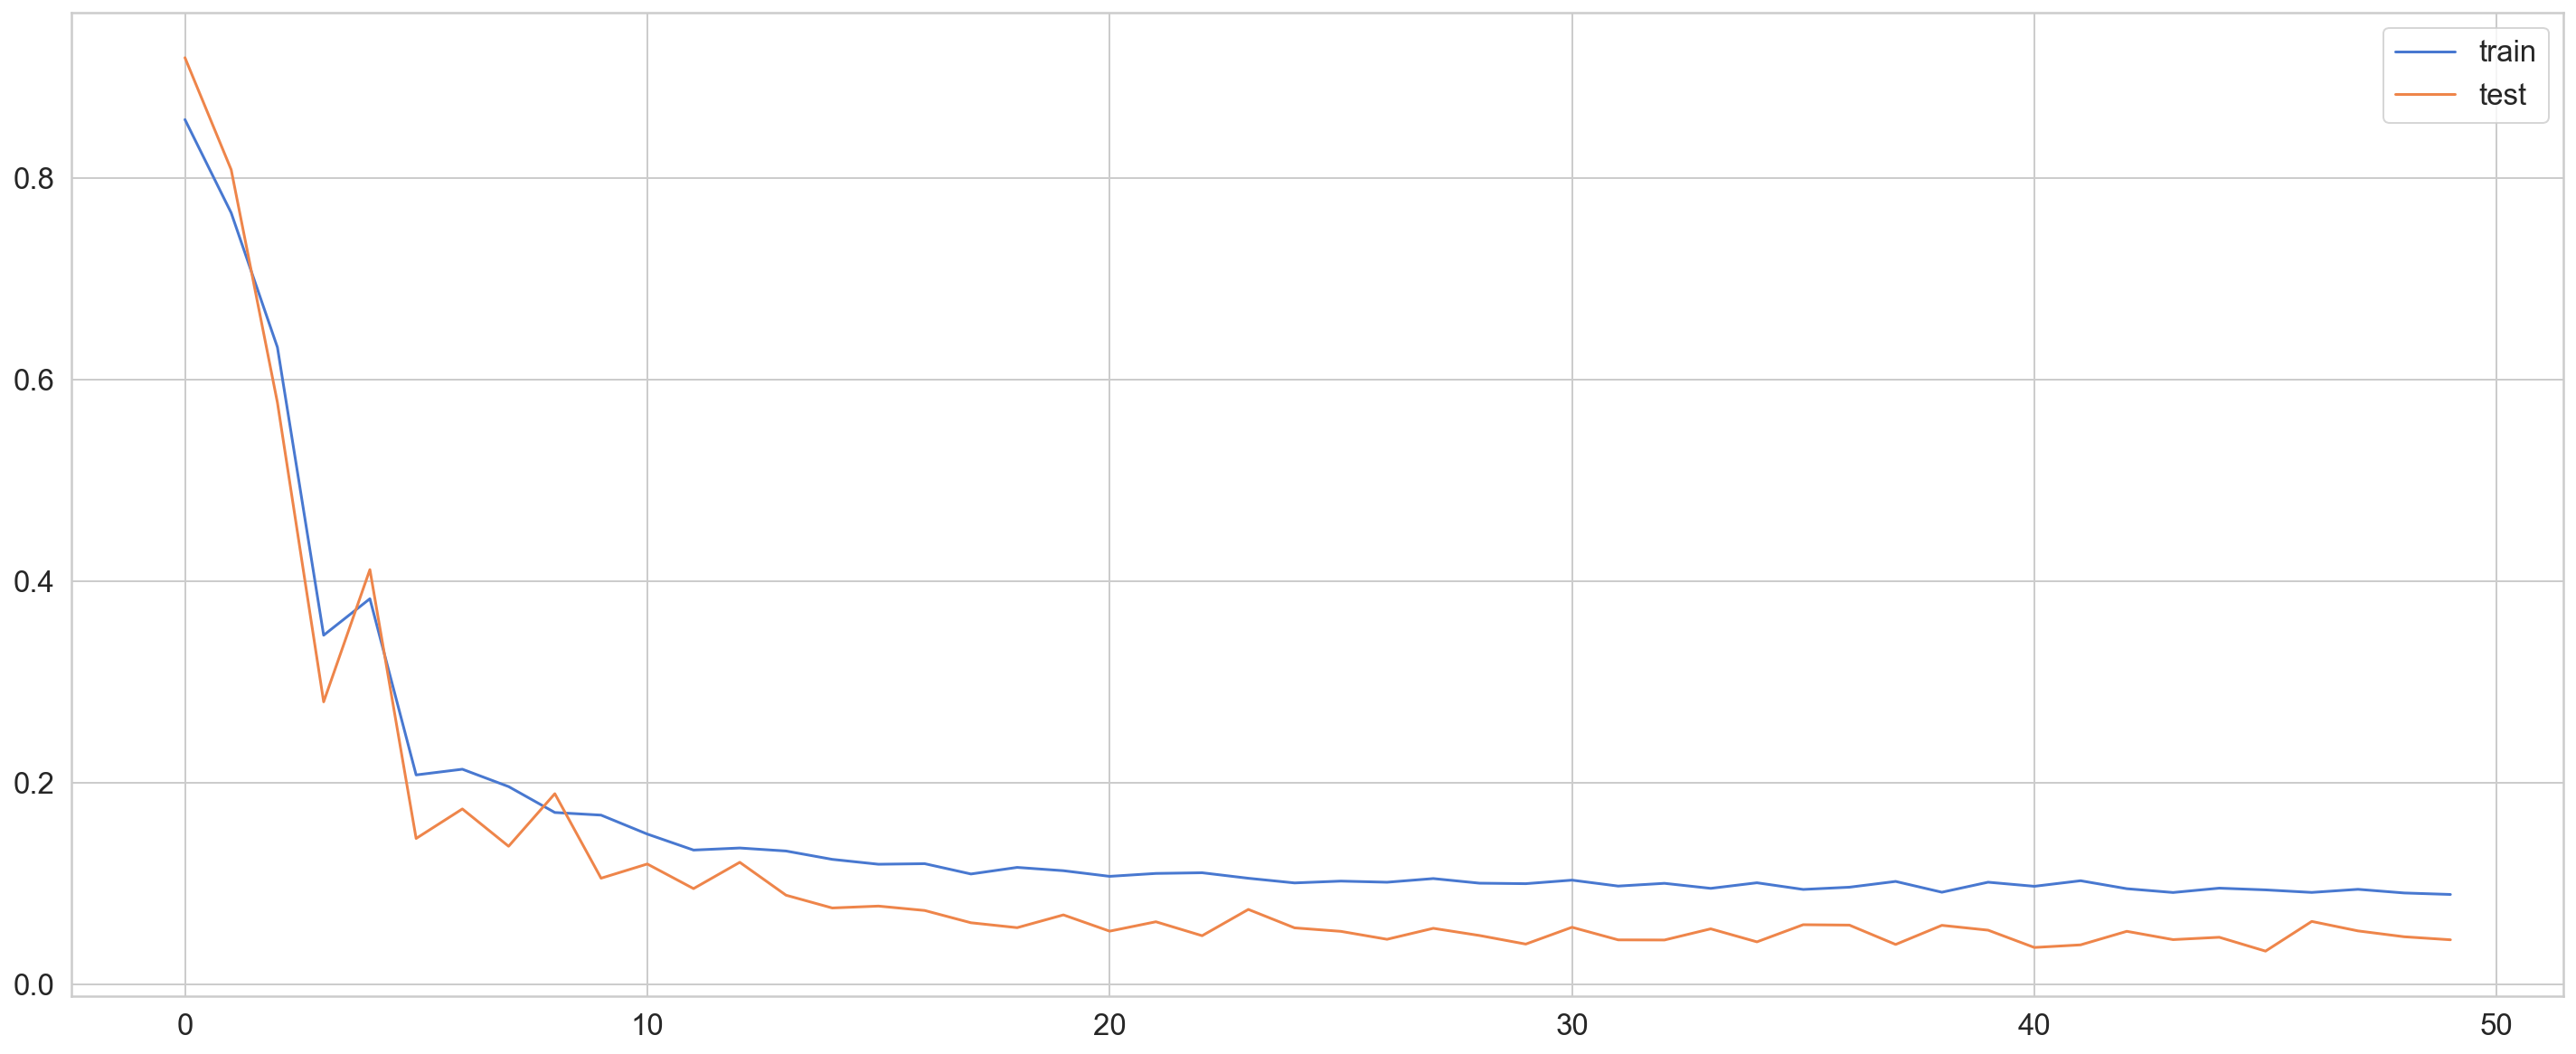

In [258]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [284]:
TIME_STEPS = 30
X_train, y_train = create_dataset(train[['Passengers']], train.Passengers, TIME_STEPS)
X_test, y_test = create_dataset(test[['Passengers']], test.Passengers, TIME_STEPS)

print(X_train.shape)

(91, 30, 1)


In [285]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))

model.compile(loss='mae', optimizer='adam', metrics = ['accuracy'])

In [286]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
3/3 [==============================] - 6s 575ms/step - loss: 0.7079 - accuracy: 0.0000e+00 - val_loss: 0.7115 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 45ms/step - loss: 0.5388 - accuracy: 0.0000e+00 - val_loss: 0.3894 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 52ms/step - loss: 0.4524 - accuracy: 0.0000e+00 - val_loss: 0.4132 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 57ms/step - loss: 0.4871 - accuracy: 0.0000e+00 - val_loss: 0.4895 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 51ms/step - loss: 0.4739 - accuracy: 0.0000e+00 - val_loss: 0.3742 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 50ms/step - loss: 0.4453 - accuracy: 0.0000e+00 - val_loss: 0.3392 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 47ms/step - loss: 0.4461 - accuracy: 0.0000e+00 - val_loss: 0.33

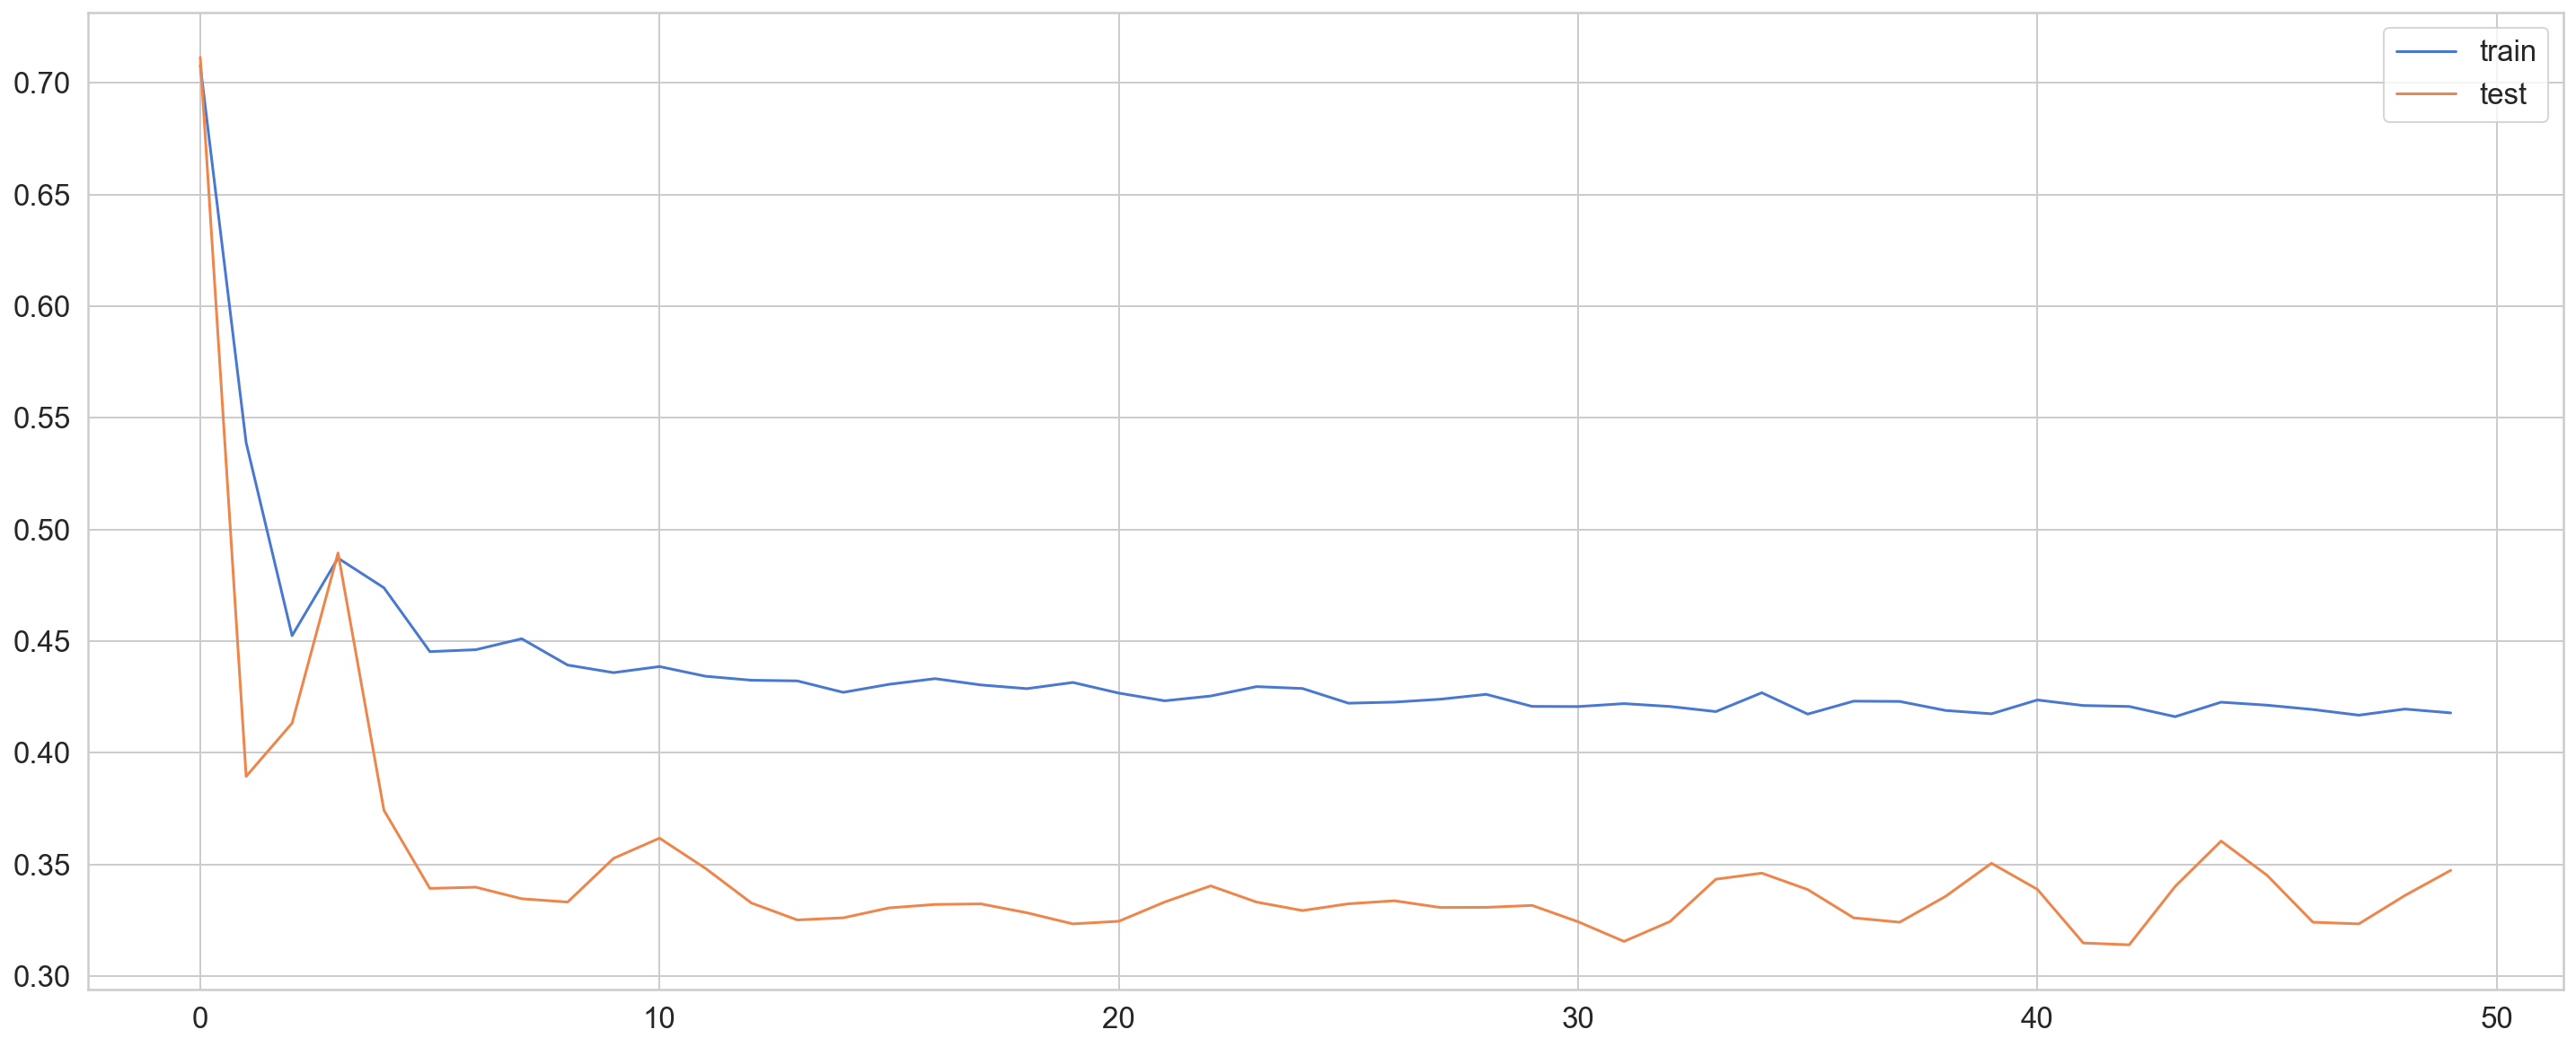

In [287]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [288]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


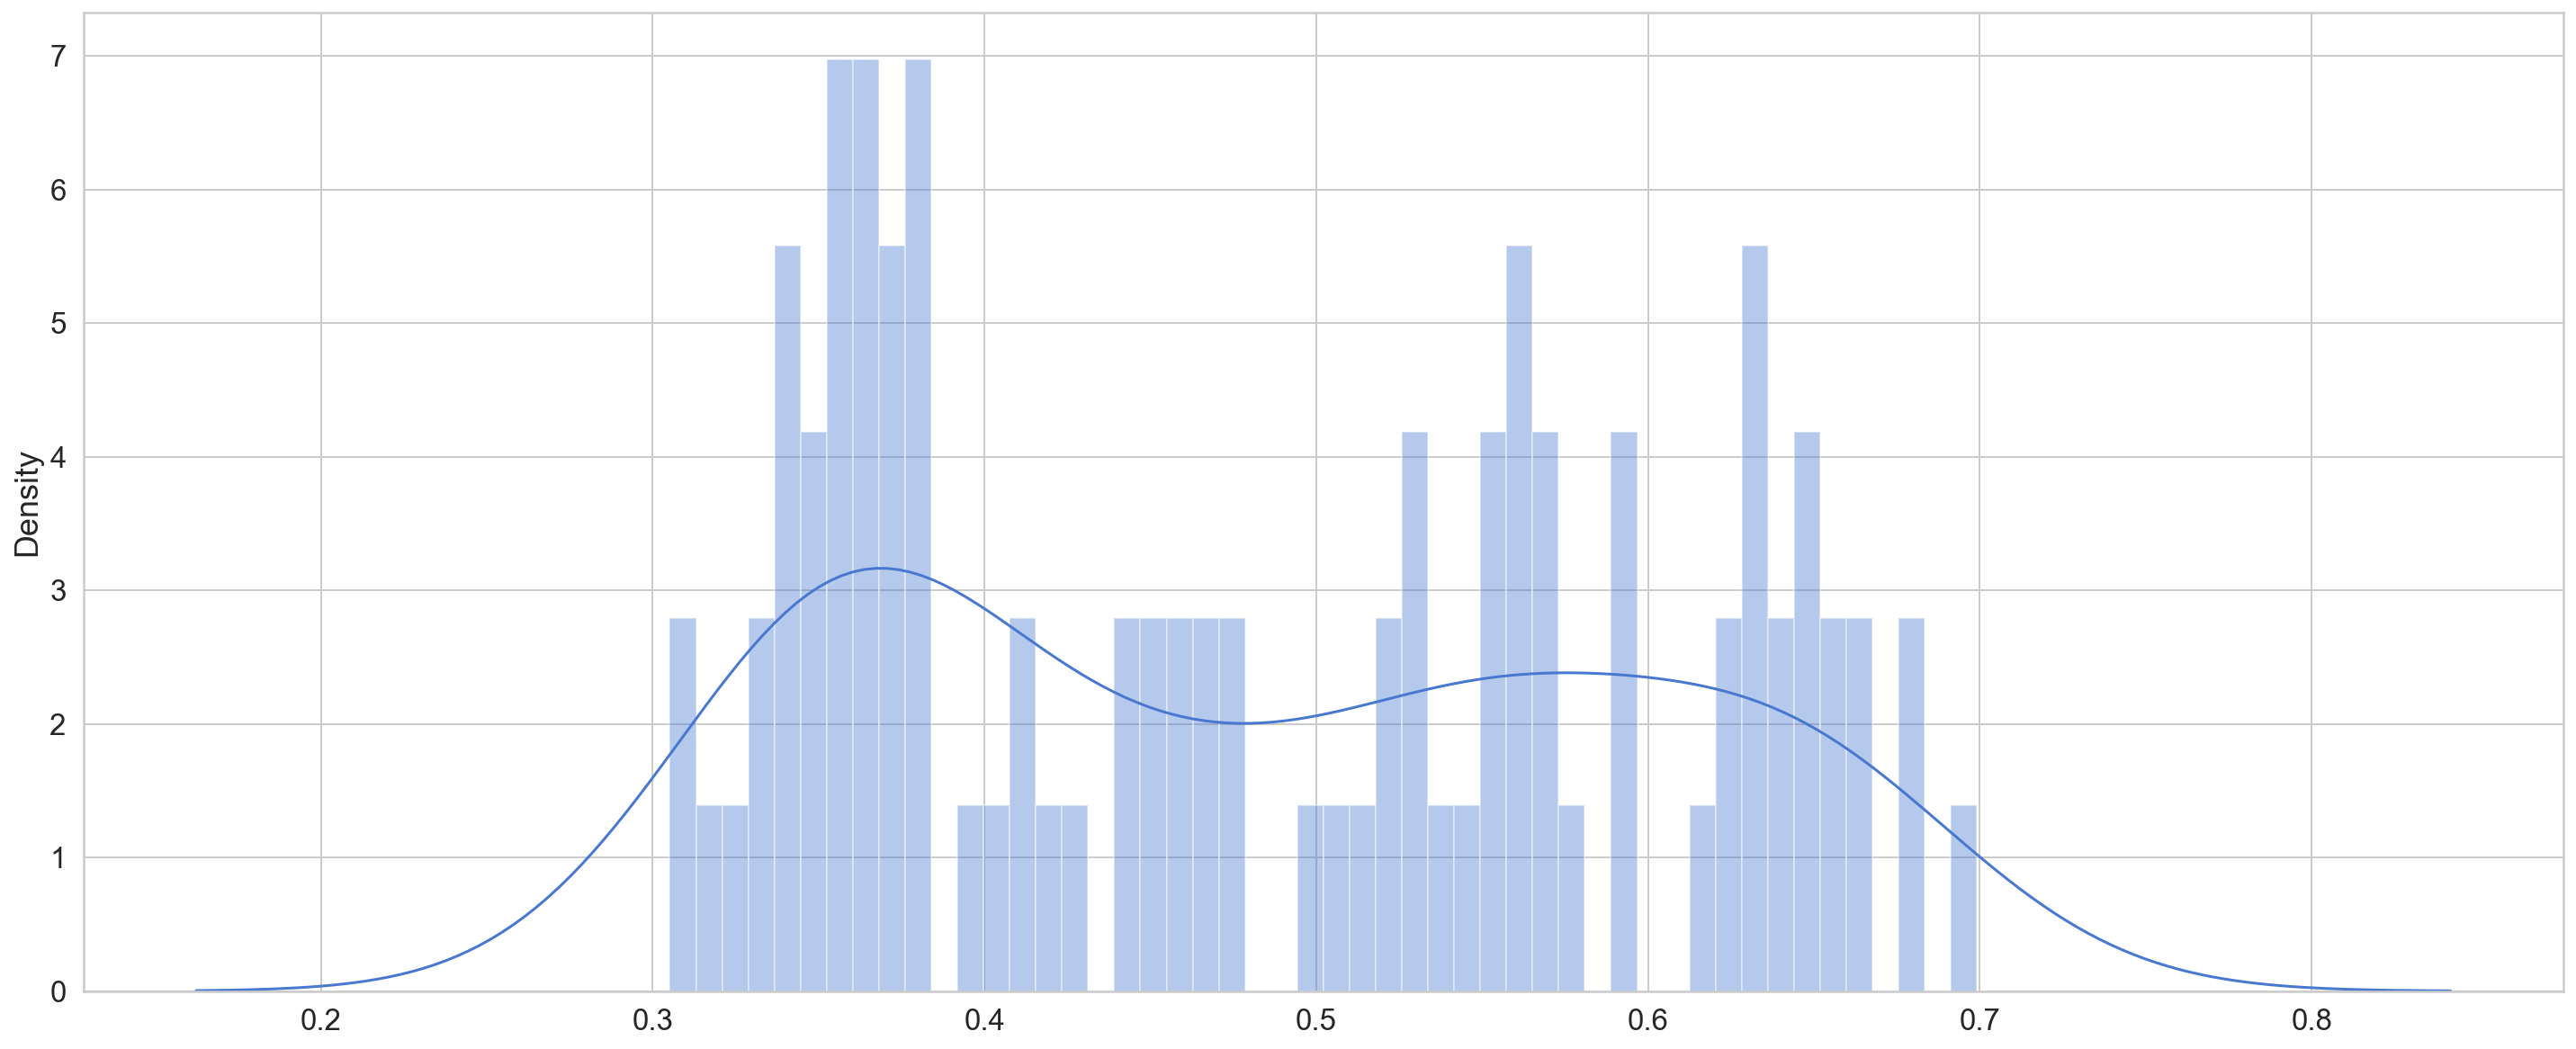

In [289]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [290]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [337]:
THRESHOLD = 0.678

test_score_data0 = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_data0['loss'] = test_mae_loss
test_score_data0['threshold'] = THRESHOLD
test_score_data0['anomaly'] = test_score_data0.loss > test_score_data0.threshold
test_score_data0['Passengers'] = test[TIME_STEPS:].Passengers

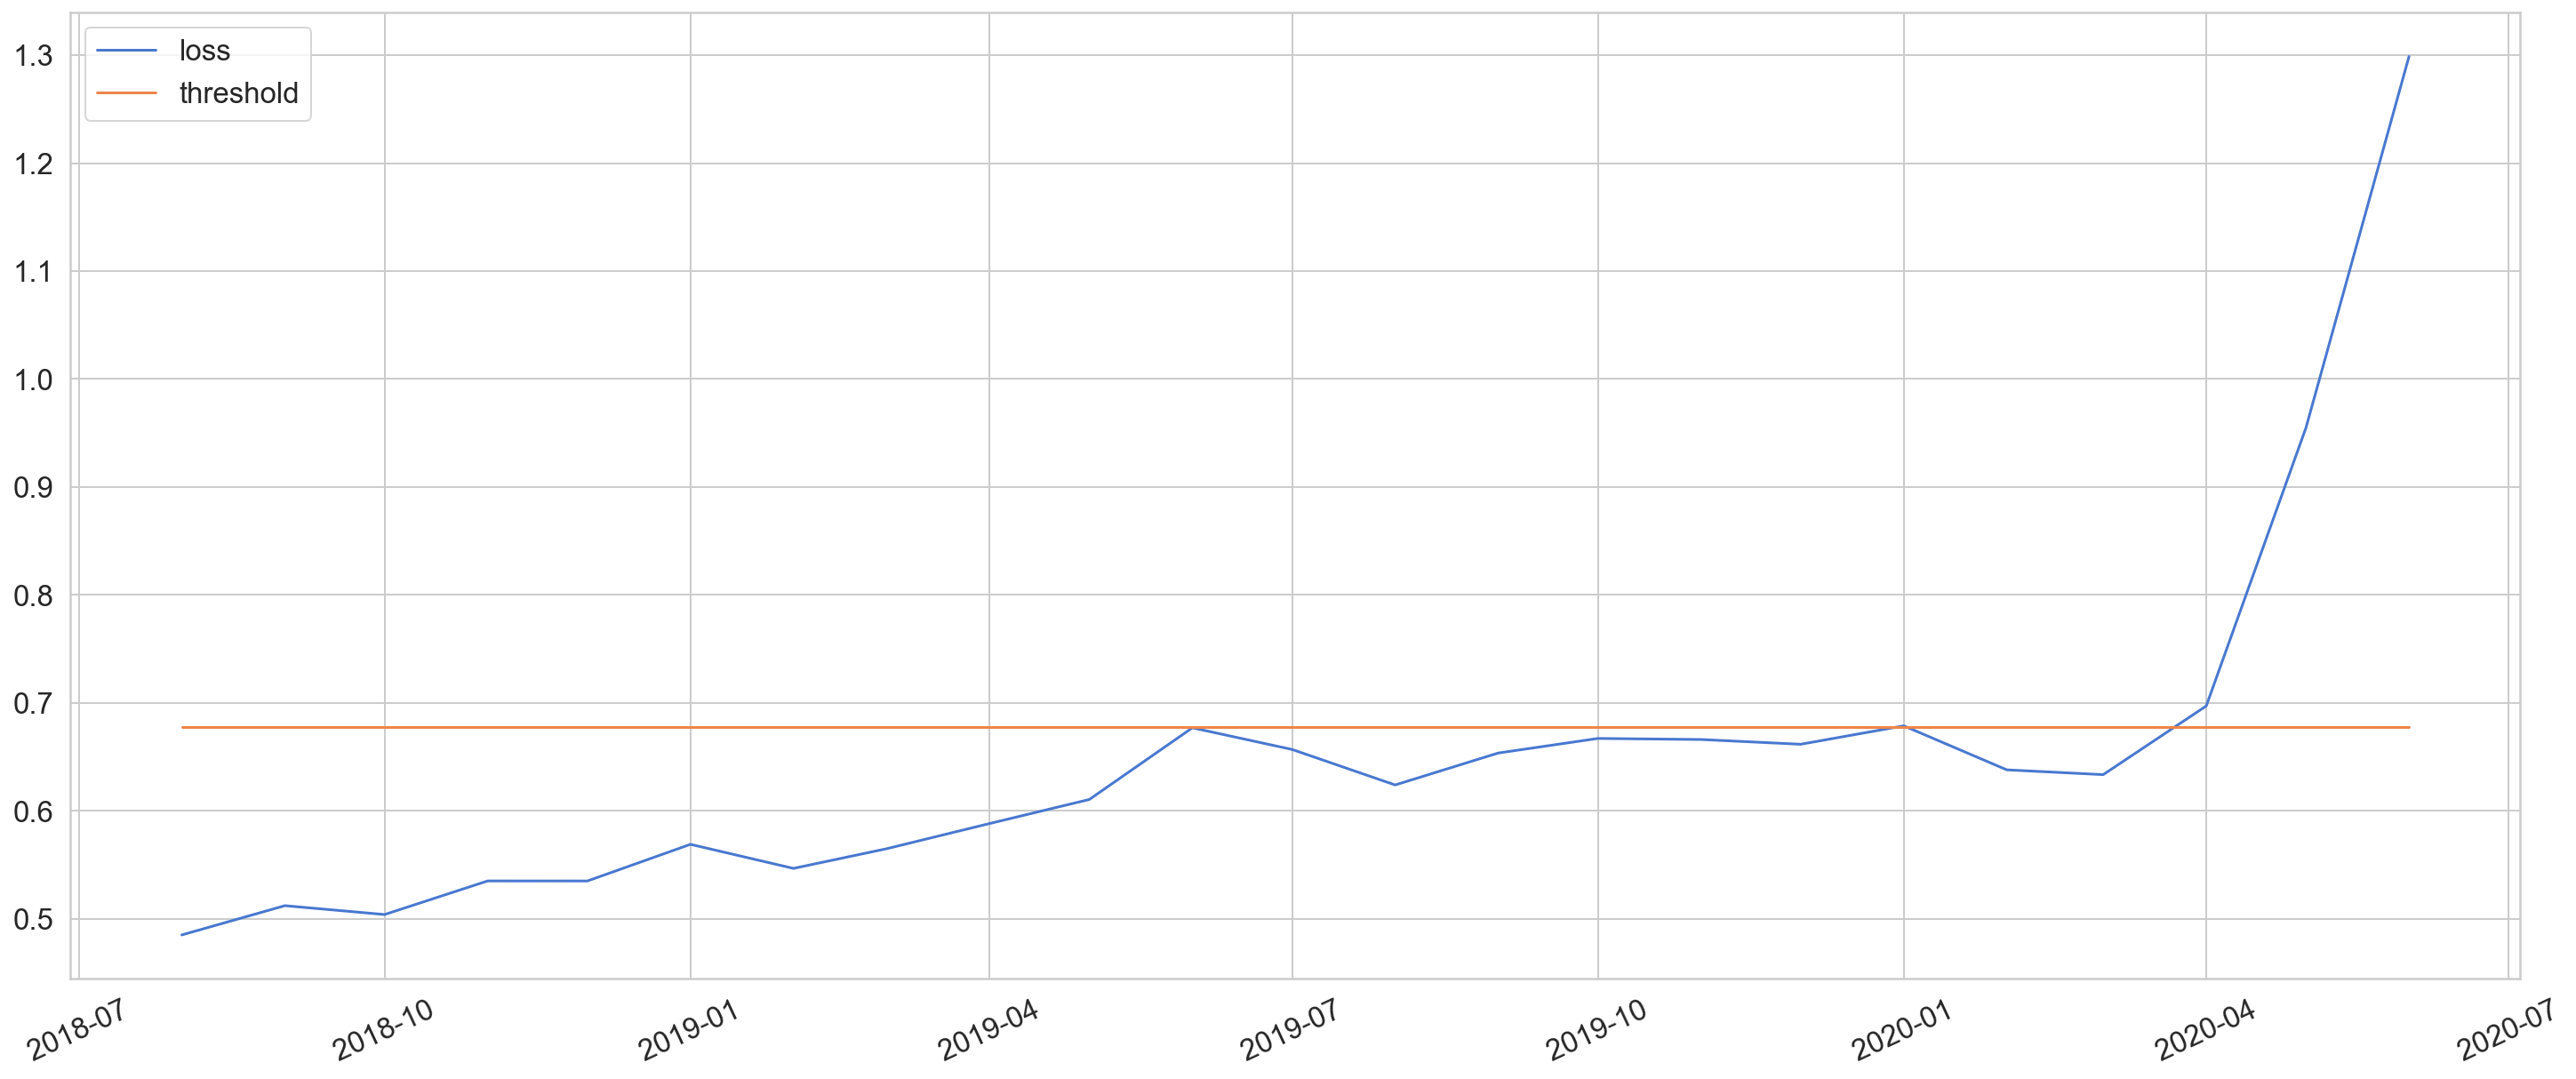

In [338]:
plt.plot(test_score_data0.index, test_score_data0.loss, label='loss')
plt.plot(test_score_data0.index, test_score_data0.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [339]:
anomalies = test_score_data0[test_score_data0.anomaly == True]
anomalies.head()

,loss,threshold,anomaly,Passengers
Period,,,,
2020-01-01,0.678722,0.678,True,2.238038
2020-04-01,0.697128,0.678,True,-2.371911
2020-05-01,0.954908,0.678,True,-2.841902
2020-06-01,1.298877,0.678,True,-2.740767


In [340]:
anomalies

,loss,threshold,anomaly,Passengers
Period,,,,
2020-01-01,0.678722,0.678,True,2.238038
2020-04-01,0.697128,0.678,True,-2.371911
2020-05-01,0.954908,0.678,True,-2.841902
2020-06-01,1.298877,0.678,True,-2.740767


C:\Users\LENOVO PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


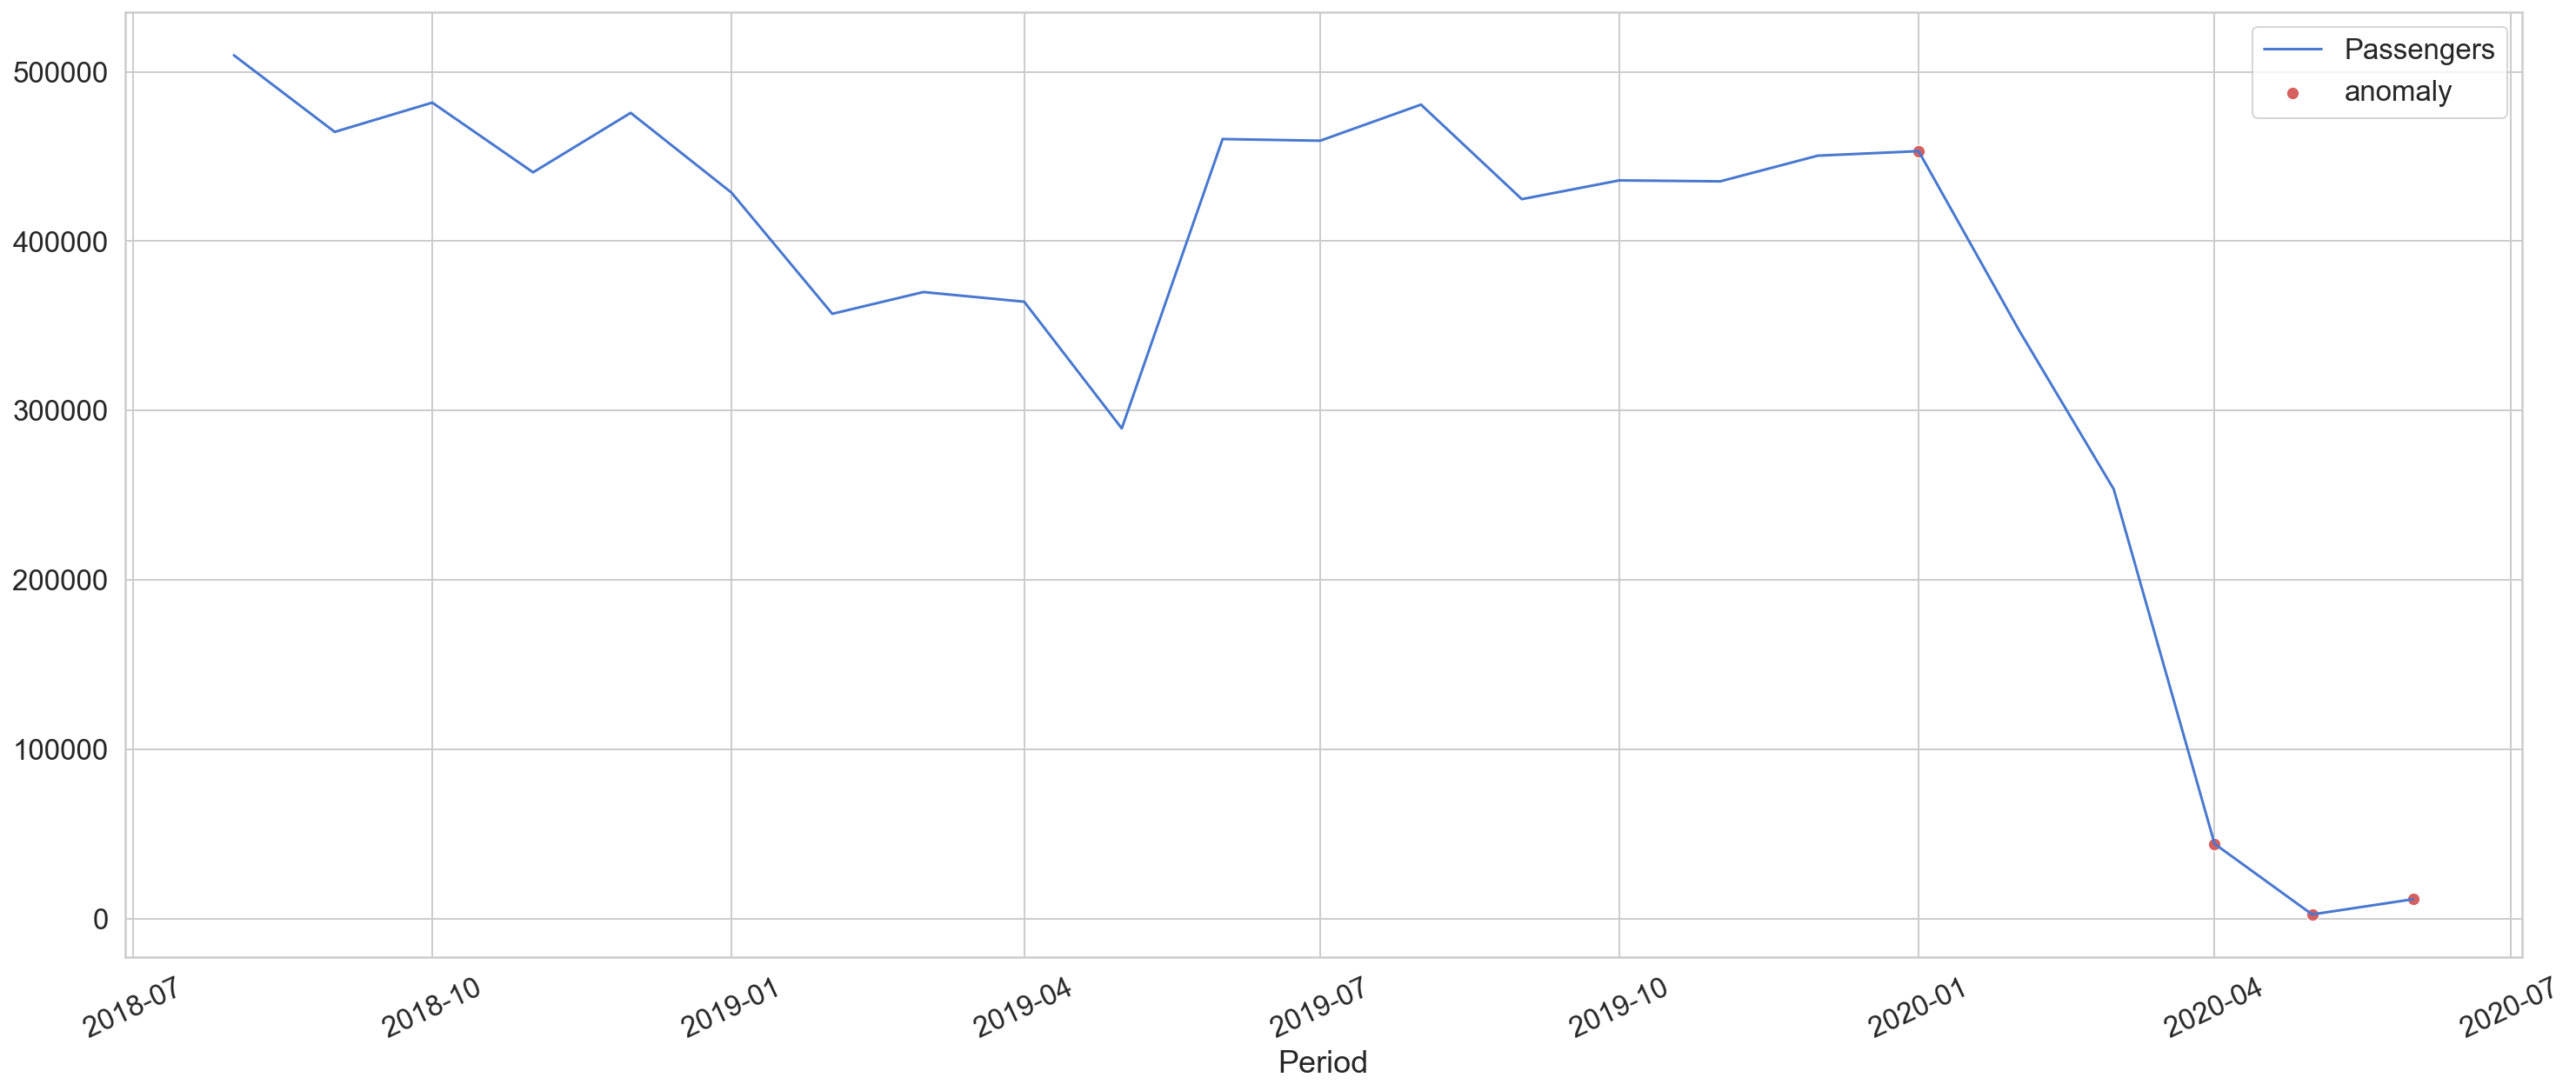

In [341]:
plt.plot(
  test[TIME_STEPS:].index, 
  scaler.inverse_transform(test[TIME_STEPS:].Passengers), 
  label='Passengers'
);

sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.Passengers),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();